In [60]:
___Author___='LumberJack Jyss'

In [61]:
print('Global Optimized LumberJack Equities Method\n°OoO_FOREX_Oo0°\nLumberJack Jyss 5779(c)')

Global Optimized LumberJack Equities Method
°OoO_FOREX_Oo0°
LumberJack Jyss 5779(c)


In [62]:
print('Importation des librairies...')
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
print('Librairies importées')

Importation des librairies...
Librairies importées


In [108]:

start = pd.to_datetime('2014-01-28')
end = pd.to_datetime('2019-05-23')

df = web.DataReader('SPY','yahoo',start,end)

delta = round(df.shape[0])
bloc1 = round(delta*0.8)
bloc2 = delta - bloc1
print("Période d'étude : ",delta)
print('Sur un découpage 80% - 20% de la période : ')
print('Bloc 1 : ',bloc1,' jours \nBloc 2 :',bloc2,' jours')
print('Note : On change de règles de calculs, car tous les jours ne sont pas ouvrés')


#dataframe = dataframe.iloc[:,1:]
df.reset_index(inplace=True)
df.head()

Période d'étude :  1339
Sur un découpage 80% - 20% de la période : 
Bloc 1 :  1071  jours 
Bloc 2 : 268  jours
Note : On change de règles de calculs, car tous les jours ne sont pas ouvrés


,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-28,179.300003,178.119995,178.139999,179.070007,110463200.0,161.464844
1,2014-01-29,178.550003,176.880005,177.580002,177.350006,216597300.0,159.913971
2,2014-01-30,179.809998,178.259995,178.830002,179.229996,118938100.0,161.609161
3,2014-01-31,179.289993,176.919998,177.009995,178.179993,194677900.0,160.662384
4,2014-02-03,178.369995,173.830002,177.970001,174.169998,254837100.0,157.046600


In [109]:
df.shape

(1339, 7)

In [110]:
data_train = df.iloc[:bloc1,:6]
data_train.head()

,Date,High,Low,Open,Close,Volume
0,2014-01-28,179.300003,178.119995,178.139999,179.070007,110463200.0
1,2014-01-29,178.550003,176.880005,177.580002,177.350006,216597300.0
2,2014-01-30,179.809998,178.259995,178.830002,179.229996,118938100.0
3,2014-01-31,179.289993,176.919998,177.009995,178.179993,194677900.0
4,2014-02-03,178.369995,173.830002,177.970001,174.169998,254837100.0


In [111]:
df.shape

(1339, 7)

In [112]:
trainset = data_train.iloc[:, 3:4].values
trainset

array([[178.13999939],
       [177.58000183],
       [178.83000183],
       ...,
       [262.91000366],
       [264.79000854],
       [267.        ]])

In [113]:
sc = MinMaxScaler(feature_range = (0,1))
trainData_scaled = sc.fit_transform(trainset)

In [114]:
x_train = []
y_train = []

In [115]:
for i in range(60, len(data_train)): #60 is the memory size, nb of rows of training data
    x_train.append(trainData_scaled[i-60:i, 0]) # adds data for the last 60 rows
    y_train.append(trainData_scaled[i,0]) # adds the prices that the model is trying to predict

# Convert to tensors
x_train, y_train = np.array(x_train), np.array(y_train)

In [116]:
x_train.shape

(1011, 60)

In [117]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # adds a 3rd dimension to the tensor
#                     array , new size -->(x, y, z)

In [118]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss='mean_squared_error')

In [119]:
model.fit(x_train, y_train, epochs = 100, batch_size = 28)

Epoch 1/100
1011/1011 [==============================] - 14s 14ms/step - loss: 0.0336
Epoch 2/100
1011/1011 [==============================] - 8s 8ms/step - loss: 0.0044
Epoch 3/100
1011/1011 [==============================] - 8s 8ms/step - loss: 0.0039
Epoch 4/100
1011/1011 [==============================] - 8s 8ms/step - loss: 0.0038
Epoch 5/100
1011/1011 [==============================] - 8s 8ms/step - loss: 0.0033
Epoch 6/100
1011/1011 [==============================] - 9s 9ms/step - loss: 0.0033
Epoch 7/100
1011/1011 [==============================] - 10s 10ms/step - loss: 0.0031
Epoch 8/100
1011/1011 [==============================] - 9s 9ms/step - loss: 0.0031
Epoch 9/100
1011/1011 [==============================] - 9s 9ms/step - loss: 0.0031
Epoch 10/100
1011/1011 [==============================] - 9s 9ms/step - loss: 0.0030
Epoch 11/100
1011/1011 [==============================] - 9s 9ms/step - loss: 0.0028
Epoch 12/100
1011/1011 [==============================] - 9s 8ms/step 

In [120]:
model.save("SPY_RNN.hd5f")

In [121]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-28,179.300003,178.119995,178.139999,179.070007,110463200.0,161.464844
1,2014-01-29,178.550003,176.880005,177.580002,177.350006,216597300.0,159.913971
2,2014-01-30,179.809998,178.259995,178.830002,179.229996,118938100.0,161.609161
3,2014-01-31,179.289993,176.919998,177.009995,178.179993,194677900.0,160.662384
4,2014-02-03,178.369995,173.830002,177.970001,174.169998,254837100.0,157.046600


In [122]:
bloc1

1071

In [123]:
data_test= df.iloc[bloc1:,:6] # Import Test Data

In [124]:
data_train.tail()

,Date,High,Low,Open,Close,Volume
1066,2018-04-23,267.890015,265.350006,267.260010,266.570007,65558000.0
1067,2018-04-24,267.980011,261.279999,267.730011,262.980011,112885500.0
1068,2018-04-25,264.130005,260.850006,262.910004,263.630005,103840900.0
1069,2018-04-26,267.250000,264.290009,264.790009,266.309998,67731900.0
1070,2018-04-27,267.339996,265.500000,267.000000,266.559998,57053600.0


In [125]:
data_test.head()

,Date,High,Low,Open,Close,Volume
1071,2018-04-30,267.890015,264.429993,267.260010,264.510010,82182300.0
1072,2018-05-01,265.100006,262.109985,263.869995,264.980011,74203400.0
1073,2018-05-02,265.679993,262.760010,264.760010,263.200012,86368900.0
1074,2018-05-03,263.359985,259.049988,262.260010,262.619995,136311500.0
1075,2018-05-04,266.790009,261.149994,261.519989,266.019989,91222100.0


In [126]:
actual_stock_price = data_test.iloc[:, 3:4].values # Get the Open Prices

In [127]:
data_total = pd.concat((data_train['Open'], data_test['Open']), axis=0) 
# combines the train and test data (axis=0 labels by index)

In [128]:
data_total[-5:]

1334    285.839996
1335    285.140015
1336    284.059998
1337    285.829987
1338    285.450012
Name: Open, dtype: float64

In [129]:
inputs = data_total[len(data_total) - len(data_test)-60:].values #removes the answers
print(len(data_total))
print(len(data_test))

inputs = inputs.reshape(-1, 1) #Converts the row of values into a column vector
inputs = sc.transform(inputs) # Feature Scaling (0-1)
inputs.shape

1339
268


(328, 1)

In [130]:
# Prepare Testing Inputs
x_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i, 0]) #Prepares the 60 data memory input

x_test = np.array(x_test) #Turn the inputs into an array
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) # Add a 3rd dimension

In [131]:
# Use the RNN to make the predeictions 
raw_prediction = model.predict(x_test)

In [132]:
price_prediction = sc.inverse_transform(raw_prediction) # Undoes the normalization into usable values
price_prediction [0:5]

array([[263.9114 ],
       [264.8662 ],
       [265.10098],
       [264.9873 ],
       [264.1627 ]], dtype=float32)

In [142]:
sc2 = MinMaxScaler(feature_range = (-1,1))

raw_prediction = sc2.fit_transform(raw_prediction)

Suggestion_long = []
percentChange_long = []
Suggestion_short = []
percentChange_short = []

for d in range(1,len(raw_prediction)):
    percentChange_long.append(float((raw_prediction[d]-raw_prediction[d-1])))
    percentChange_short.append(float((raw_prediction[d]-raw_prediction[d-1])))

for n in percentChange_long:
    #print(n)
    if n > 0.02:
        Suggestion_long.append(-1) # Sell after a threshhold of increase
    elif n < 0.02:
        Suggestion_long.append(1) # Buy when there is a drop
    else:
        Suggestion_long.append(0)
#print(Buy)

    
for n in percentChange_short:
    #print(n)
    if n < -0.02:
        Suggestion_short.append(1) # Buy after a threshhold of increase
    elif n > 0.02:
        Suggestion_short.append(-1) # Sell when there is a drop
    else:
        Suggestion_short.append(0)
#print(Buy)

In [143]:
PurchaseHistory_long=[]
BuyPoints_long =  [[], []]
SellPoints_long = [[], []]
bought_long = False
PurchaseHistory_short=[]
BuyPoints_short =  [[], []]
SellPoints_short = [[], []]
sold_short = False

for i in range(0, len(actual_stock_price)-1):
    if Suggestion_long[i] == 1 and not bought_long:
        PurchaseHistory_long.append(["Buy: ", actual_stock_price[i], i])
        BuyPoints_long[0].append(actual_stock_price[i])
        BuyPoints_long[1].append(i)
        bought_long = True
    
    if Suggestion_long[i] == -1 and bought_long:
        PurchaseHistory_long.append(["Sell:", actual_stock_price[i], i])
        SellPoints_long[0].append(actual_stock_price[i])
        SellPoints_long[1].append(i)        
        bought_long = False
    
    if Suggestion_short[i] == -1 and not sold_short:
        PurchaseHistory_short.append(["Sell: ", actual_stock_price[i], i])
        SellPoints_short[0].append(actual_stock_price[i])
        SellPoints_short[1].append(i)
        sold_short = True
    
    if Suggestion_short[i] == 1 and sold_short:
        PurchaseHistory_short.append(["Buy:", actual_stock_price[i], i])
        BuyPoints_short[0].append(actual_stock_price[i])
        BuyPoints_short[1].append(i)        
        sold_short = False
        
if len(PurchaseHistory_long)%2 != 0:
    PurchaseHistory_long.pop()
    BuyPoints_long[0].pop()
    BuyPoints_long[1].pop() 


if len(PurchaseHistory_short)%2 != 0:
    PurchaseHistory_short.pop()
    SellPoints_short[0].pop()
    SellPoints_short[1].pop() 


In [144]:
purchase = 0
Profit_long = 0
for purchase in range(1, len(PurchaseHistory_long)+1, 2):
    MoneyMade_long = float(PurchaseHistory_long[purchase][1] - float(PurchaseHistory_long[purchase-1][1]))
    Profit_long += MoneyMade_long

print('Profit Long : $'+ str(round(Profit_long, 2)))

Profit Long : $2.6


In [145]:
Profit_short = 0
for purchase in range(1, len(PurchaseHistory_short)+1, 2):
    MoneyMade_short = (float(-PurchaseHistory_short[purchase][1] + float(PurchaseHistory_short[purchase-1][1])))
    Profit_short += MoneyMade_short

print('Profit Short : $'+ str(round(Profit_short, 2)))

Profit Short : $-5.28


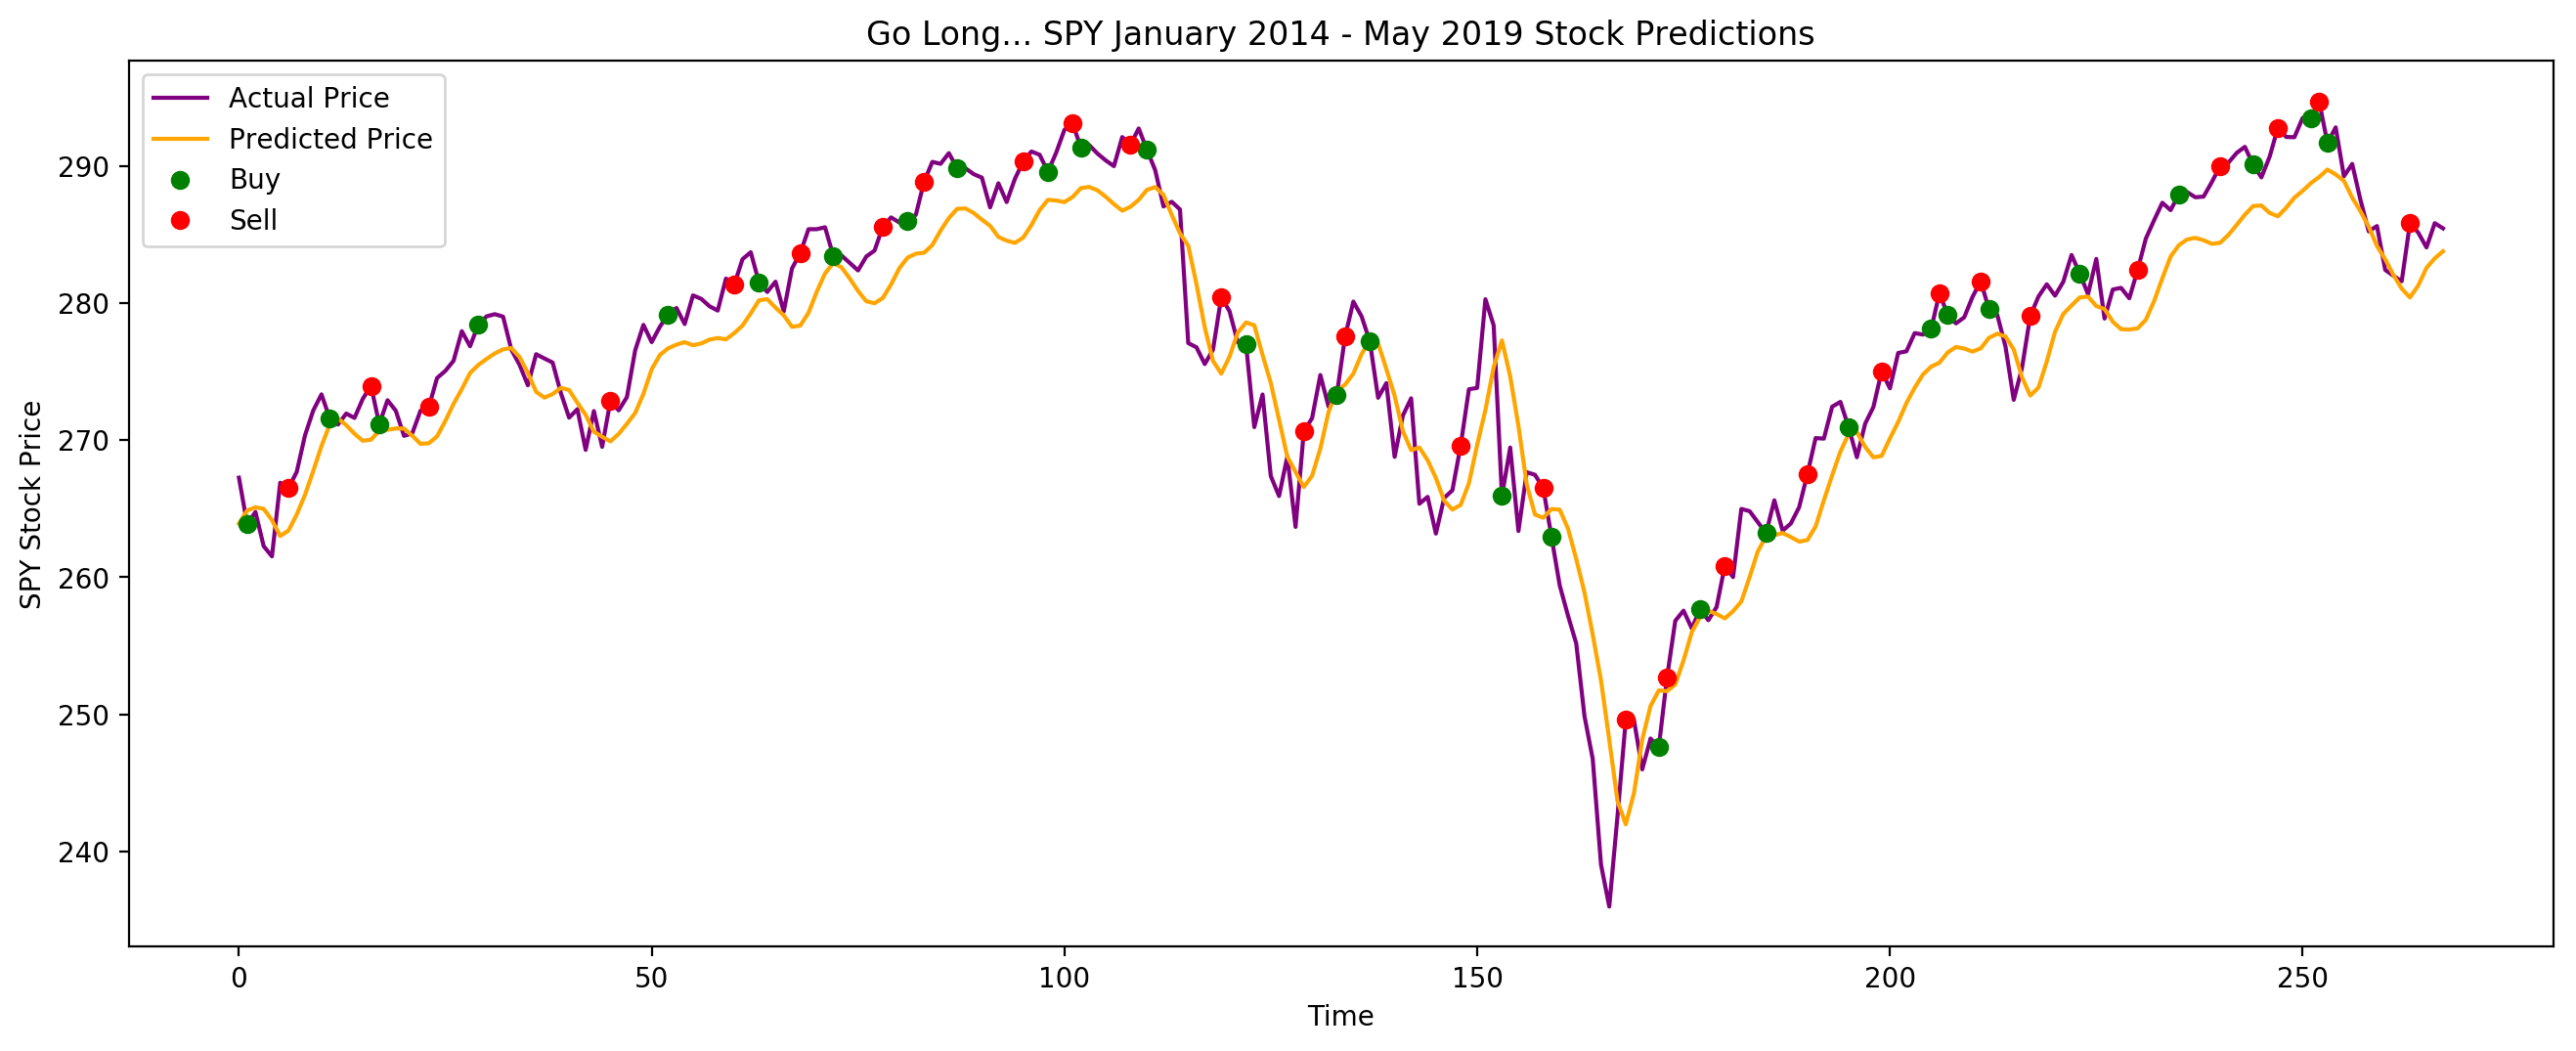

In [146]:
plt.figure(figsize=(16,6),dpi=200)
plt.plot(actual_stock_price, color =  'purple', label = "Actual Price")
plt.plot(price_prediction, color = 'orange', label = "Predicted Price")
plt.plot(BuyPoints_long[1], BuyPoints_long[0], "go",label='Buy')
plt.plot(SellPoints_long[1], SellPoints_long[0], "ro",label='Sell')
plt.title("Go Long... SPY January 2014 - May 2019 Stock Predictions")
plt.xlabel('Time')
plt.ylabel('SPY Stock Price')
plt.legend()
plt.show()

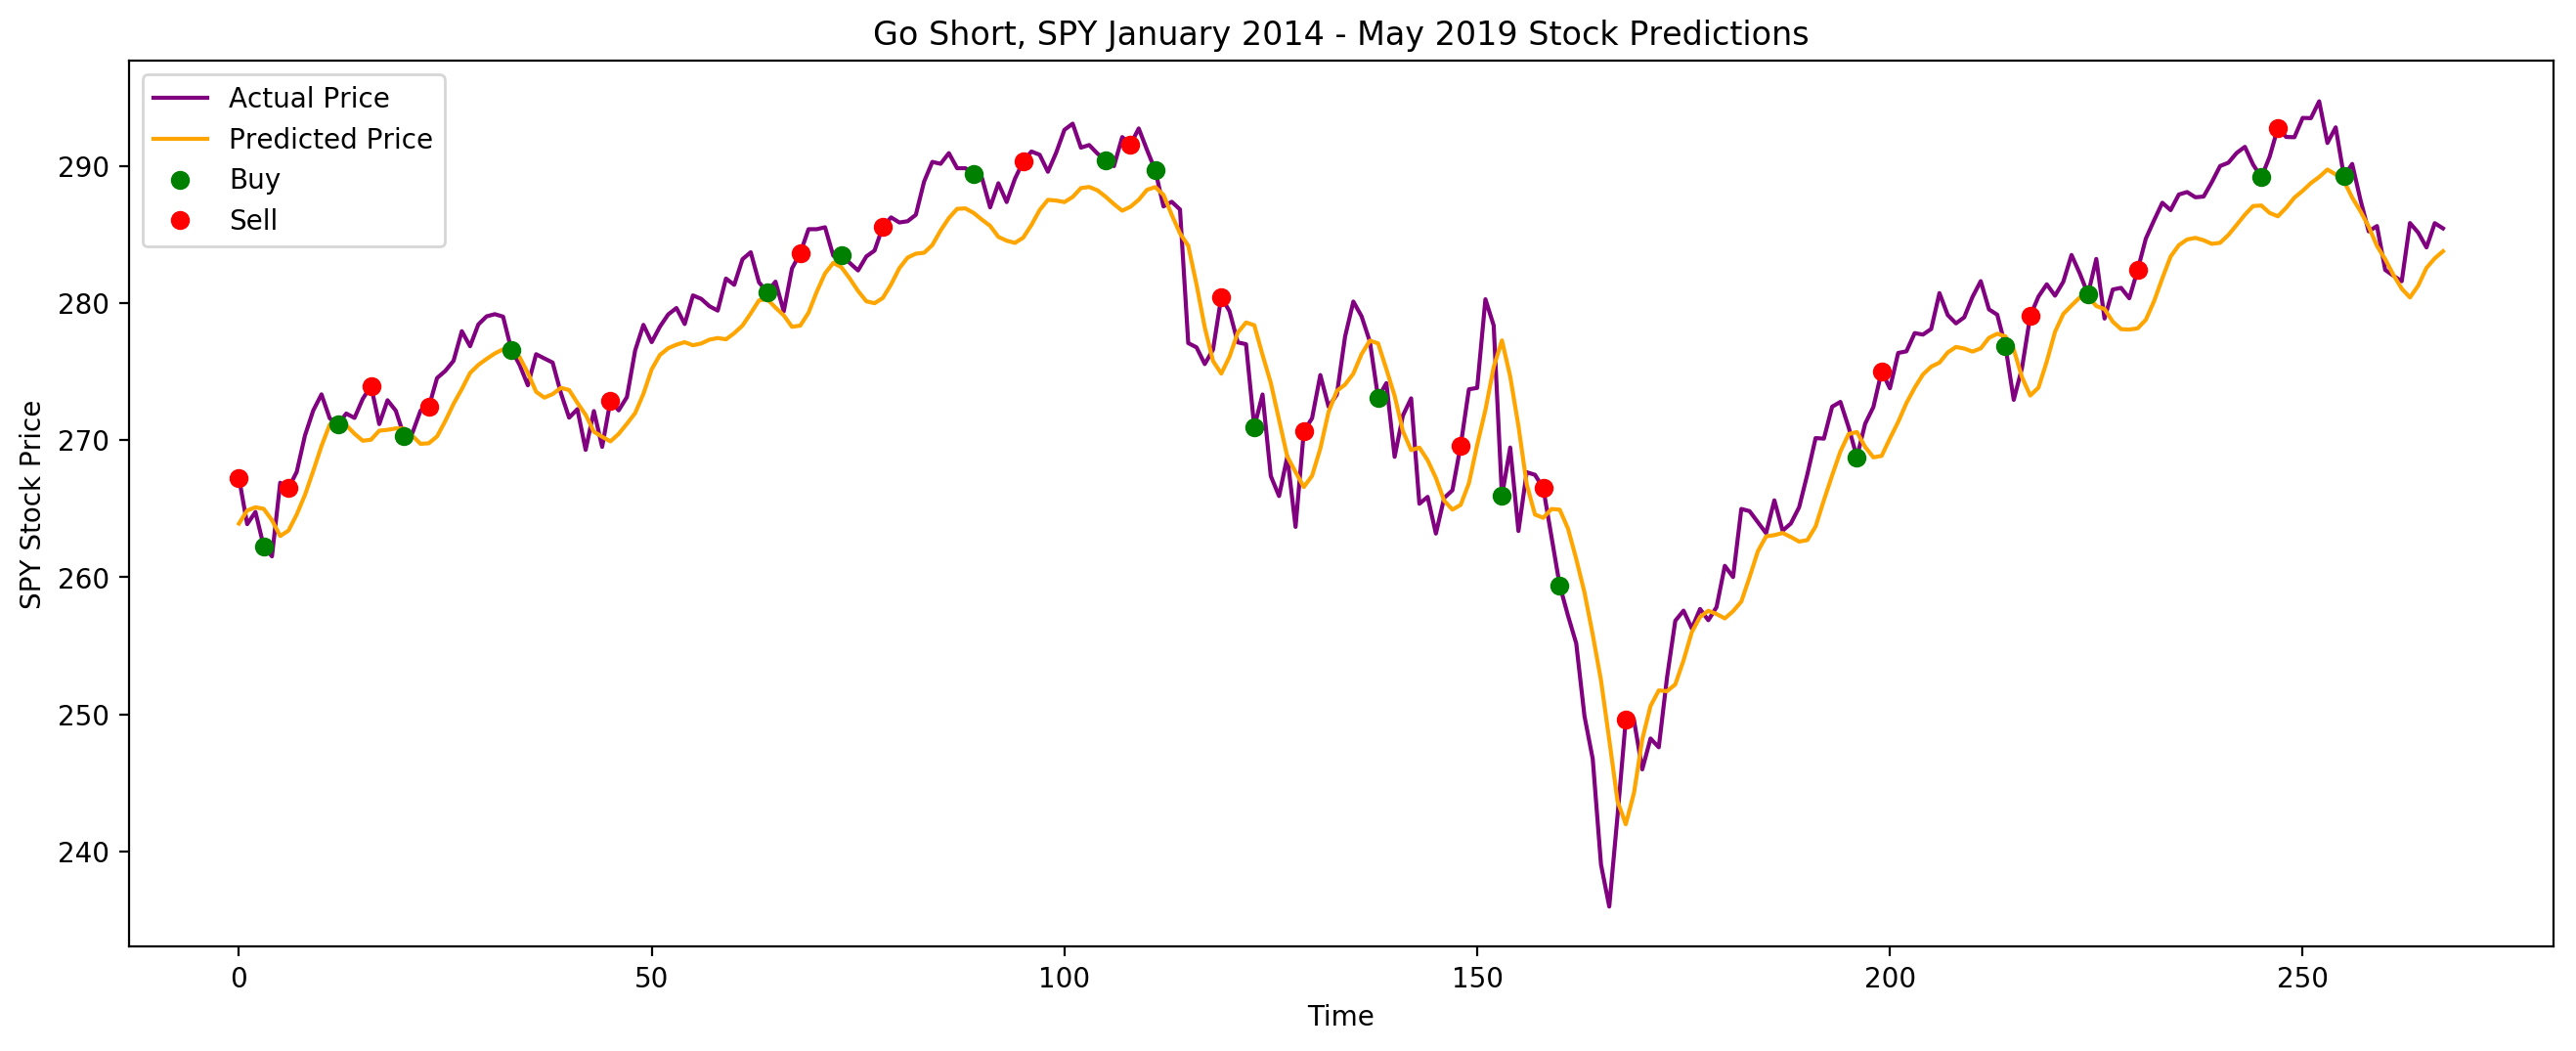

In [138]:
plt.figure(figsize=(16,6),dpi=200)
plt.plot(actual_stock_price, color =  'purple', label = "Actual Price")
plt.plot(price_prediction, color = 'orange', label = "Predicted Price")
plt.plot(BuyPoints_short[1], BuyPoints_short[0], "go",label='Buy')
plt.plot(SellPoints_short[1], SellPoints_short[0], "ro",label='Sell')

plt.title("Go Short, SPY January 2014 - May 2019 Stock Predictions")
plt.xlabel('Time')
plt.ylabel('SPY Stock Price')
plt.legend()
plt.show()

In [139]:
print('Cumulative Profit :','$'+ str(round(Profit_long+Profit_short, 2)))

Cumulative Profit : $-15.35


In [140]:
MinimumRequiredCapital_long = max(BuyPoints_long[0])
MinimumRequiredCapital_short = max(BuyPoints_short[0])
ROI_long = Profit_long / MinimumRequiredCapital_long * 100
ROI_short = Profit_short / MinimumRequiredCapital_short * 100
print('Summary SPY')
print('Total period : From ',start,' to ',end)
print('Training on ',bloc1,' days')
print('Testing on ',bloc2,' days')
print('Minimum Required Capital long :',round(MinimumRequiredCapital_long[0]),'$')
print('Minimum Required Capital short :',round(MinimumRequiredCapital_short[0]),'$')
print('Number of long :',len(BuyPoints_long[1]))
print('Number of short :',len(BuyPoints_short[1]))
print('Short CumProfit :''$'+ str(round(Profit_short, 2)))
print('Long CumProfit :''$'+ str(round(Profit_long, 2)))
print('Cumulative Profit :','$'+ str(round(Profit_long+Profit_short, 2)))
print("Return on Long Investment:", round(float(ROI_long), 2),"%")
print("Return on Short Investment:", round(float(ROI_short), 2),"%")

Summary SPY
Total period : From  2014-01-28 00:00:00  to  2019-05-23 00:00:00
Training on  1071  days
Testing on  268  days
Minimum Required Capital long : 293.0 $
Minimum Required Capital short : 290.0 $
Number of long : 29
Number of short : 18
Short CumProfit :$-17.95
Long CumProfit :$2.6
Cumulative Profit : $-15.35
Return on Long Investment: 0.89 %
Return on Short Investment: -6.18 %


In [141]:
df.shape

(1339, 7)